In [16]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The original plan for this dataset was to use the Statistics Canada API to programatically download all the required data,
# but it turns out that The APIs for various years are very different, and there they don't work well with any data before 2016.
# To avoid any issues here, census data for 2011, 2016, and 2021 have been downloaded as CSV files and will be imported directly.

# Load the 2011, 2016, and 2021 census data for New Brunswick
# Let's start with the most recent year and work our way back
census2021 = pd.read_csv("statCanData/NB_2021_Full.csv", low_memory=False)
# We'll also clean up the 'CHARACTERISTIC_NAME' column to remove whitespace and unknown characters
census2021['CHARACTERISTIC_NAME'] = census2021['CHARACTERISTIC_NAME'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
census2021['CHARACTERISTIC_NAME'] = census2021['CHARACTERISTIC_NAME'].str.strip()

census2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699846 entries, 0 to 699845
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CENSUS_YEAR          699846 non-null  int64  
 1   DGUID                699846 non-null  object 
 2   ALT_GEO_CODE         699846 non-null  int64  
 3   GEO_LEVEL            699846 non-null  object 
 4   GEO_NAME             699846 non-null  object 
 5   TNR_SF               699846 non-null  float64
 6   TNR_LF               699846 non-null  float64
 7   DATA_QUALITY_FLAG    699846 non-null  int64  
 8   CHARACTERISTIC_ID    699846 non-null  int64  
 9   CHARACTERISTIC_NAME  699846 non-null  object 
 10  CHARACTERISTIC_NOTE  74214 non-null   float64
 11  C1_COUNT_TOTAL       672088 non-null  float64
 12  SYMBOL               27775 non-null   object 
 13  C2_COUNT_MEN+        614620 non-null  float64
 14  SYMBOL.1             85226 non-null   object 
 15  C3_COUNT_WOMEN+  

In [17]:
# The 2021 Census has 15 columns. The different attributes are identified
# by the DIM column, which we will look at a bit more closely later
# Next, let's load the 2016 data and compare the two datasets
census2016 = pd.read_csv("statCanData/NB_2016_Full.csv", low_memory=False)
# As before, we'll clean up the data. The import column here is 
# 'DIM: Profile of Census Subdivisions (2247)'. A bit of a mouthful, so let's rename it
# to 'CHARACTERISTIC_NAME' to match the 2021 dataset
census2016.rename(columns={'DIM: Profile of Census Subdivisions (2247)': 'CHARACTERISTIC_NAME'}, inplace=True)
census2016['CHARACTERISTIC_NAME'] = census2016['CHARACTERISTIC_NAME'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
census2016['CHARACTERISTIC_NAME'] = census2016['CHARACTERISTIC_NAME'].str.strip()
census2016.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613431 entries, 0 to 613430
Data columns (total 15 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   CENSUS_YEAR                                       613431 non-null  int64  
 1   GEO_CODE (POR)                                    613431 non-null  int64  
 2   GEO_LEVEL                                         613431 non-null  int64  
 3   GEO_NAME                                          613431 non-null  object 
 4   GNR                                               602196 non-null  float64
 5   GNR_LF                                            602196 non-null  float64
 6   DATA_QUALITY_FLAG                                 613431 non-null  int64  
 7   CSD_TYPE_NAME                                     613431 non-null  object 
 8   ALT_GEO_CODE                                      613431 non-null  int64  
 9   CHAR

In [18]:
# The 2016 Census has 15 columns, the same as the 2021 Census.
# Finally, let's load the 2011 data and compare all three datasets
# Note the file name is different here, because the 2011 data was only available
# as a Canada-wide dataset. We can expect to have to do some work here.
census2011 = pd.read_csv("statCanData/Canada_2011_Full.csv", low_memory=False)
census2011.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479416 entries, 0 to 2479415
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Geo_Code         int64  
 1   Prov_Name        object 
 2   CD_Name          object 
 3   CSD_Name         object 
 4   CSD_Type         object 
 5   Topic            object 
 6   Characteristics  object 
 7   Note             float64
 8   Total            float64
 9   Flag_Total       object 
 10  Male             float64
 11  Flag_Male        object 
 12  Female           float64
 13  Flag_Female      object 
dtypes: float64(4), int64(1), object(9)
memory usage: 264.8+ MB


In [19]:
# Unsurprisingly, the 2011 Census data is a different shape than the other datasets.
# Let's see if we can find some common ground.

# First of all, let's trim the 2011 dataset to only include New Brunswick data
# We can use the 'Prov_Name' column to do this
census2011_nb = census2011[census2011['Prov_Name'] == 'New Brunswick']
# Let's also clean up the values in the 'Characteristics' column, as we did before
census2011_nb['Characteristics'] = census2011_nb['Characteristics'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
census2011_nb['Characteristics'] = census2011_nb['Characteristics'].str.strip()

# Now let's see if there are shared values in some of the key columns. Manual inspection
# of the data indicates that there should be some overlap between the DIM columns of 2016/2021 and the 'Characteristics' column
# of the 2011 dataset. Let's see if this is the case
unique2011 = set(census2011_nb['Characteristics'].unique())
unique2016 = set(census2016['CHARACTERISTIC_NAME'].unique())
unique2021 = set(census2021['CHARACTERISTIC_NAME'].unique())

# We can use the set intersection operator to find the common values between the three datasets
commonValues = unique2011.intersection(unique2016).intersection(unique2021)
# Let's print these out with an entry on each line
print(f'There are {len(commonValues)} common values between the three datasets. They are:')
for value in commonValues:
    print(value)


There are 126 common values between the three datasets. They are:
French
30 to 34 years
Mandarin
Polish
Czech
French only
Vietnamese
Lingala
Private dwellings occupied by usual residents
Hebrew
Macedonian
Semi-detached house
Portuguese
Sindhi
Stoney
Gujarati
Bulgarian
Armenian
Population density per square kilometre
15 to 19 years
Swahili
Oji-Cree
Tigrigna
Russian
60 to 64 years
55 to 59 years
Arabic
Greek
Married couples
Yiddish
Indo-Iranian languages, n.i.e.
35 to 39 years
Romanian
Latvian
Tagalog (Pilipino, Filipino)
Nepali
Total private dwellings
Italian
Neither English nor French
Albanian
Afrikaans
3 persons
One-person households
Dutch
45 to 49 years
70 to 74 years
Hungarian
Slovak
5 to 9 years
Other single-attached house
Khmer (Cambodian)
Kurdish
Ojibway
80 to 84 years
Malay
Spanish
English and French
Somali
65 to 69 years
Akan (Twi)
Chinese, n.o.s.
Urdu
4 persons
Croatian
Movable dwelling
Bosnian
10 to 14 years
Maltese
Slavic languages, n.i.e.
German
0 to 4 years
Single-detached

C:\Users\danes\AppData\Local\Temp\ipykernel_176928\2585270817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census2011_nb['Characteristics'] = census2011_nb['Characteristics'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
C:\Users\danes\AppData\Local\Temp\ipykernel_176928\2585270817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census2011_nb['Characteristics'] = census2011_nb['Characteristics'].str.strip()


Looks like we have quite a bit of overlap, but there are a lot of entries for things like spoken language, which we won't be using in our analysis. To keep the scope of this ISP manageable, let's trim the data frames to characters specifically related to population, households, age characteristics, and details related to occupation and employment.

That will mean
 - age characteristics 'n' to 'm' years
 - Private household counts, and counts of each household size (eg. 1 person, 2 persons, etc.)
 - A selection of data related to labour force, employment status and industry of occupation.

Critically, the 2011 data does not include any employment-related data, so we are left to decide between not including employment data, or focusing on the 2016-2021 data sets. Let's focus on the latter two datasets for now. 

In [20]:
# Since we will focus on 2016 and 2021 data, let's compare the common unique values there
commonValuesTrimmed = unique2016.intersection(unique2021)
# Again, let's print these out with an entry on each line
print(f'There are {len(commonValuesTrimmed)} common values between 2016 and 2021:')
for value in commonValuesTrimmed:
    print(value)


There are 771 common values between 2016 and 2021:
Celtic languages, n.i.e.
Naskapi
Algonquian languages, n.i.e.
Afro-Asiatic languages
Health and related fields
Barbadian
Yugoslavian, n.o.s.
Polish
Chaldean Neo-Aramaic
Private dwellings occupied by usual residents
Cuban
Other languages, n.i.e.
2 bedrooms
First generation
$125,000 to $149,999
Owner
Total - Private households by number of persons per room - 25% sample data
China
Mtis single ancestry
Sindhi
75 to 84 years
$40,000 to $49,999
Prevalence of low income based on the Low-income cut-offs, after tax (LICO-AT) (%)
Trinidad and Tobago
Lebanon
Morocco
Canadian
38. Philosophy and religious studies
15 to 19 years
26. Biological and biomedical sciences
Creole languages, n.i.e.
43. Security and protective services
Tigrigna
11. Computer and information sciences and support services
Commute within census subdivision (CSD) of residence
Average number of rooms per dwelling
45. Social sciences
$45,000 to $49,999
Tajik
Grenadian
Edo
Business

In [21]:
# Lots of common values here. Let's try to trim the DFs down to the ones
# we are interested in using the DIM column.

def trimCensusDF(df):
    ''' 
    Trim the dataframe to only include values related to population, age, and employment
    Requires the 'CHARACTERISTIC_NAME' column to be present in the dataframe

    Parameters:
    df (DataFrame): The dataframe to be trimmed
    '''
    # Let's define a list of key words that we are interested in
    # We will use this list to filter the dataframe
    keyWords = ['population', 
                'household', 
                'employment', 
                'industry', 
                'labour', # Labour force information
                'years', # To catch age categories
                'decile', # To catch income decile
                'Employ', # Employment status
                'Unemploy', # Employment status
                'Occupation', # Industry of occupation
                'occupation' # Industry of occupation
                '$', # To catch income values. This will generate a lot of duplicates, but we will handle that later
                ]
    trimmedDF = df[df['CHARACTERISTIC_NAME'].str.contains('|'.join(keyWords), na = False, case=False)]
    return trimmedDF

# Trim the 2016 and 2021 datasets
trimmed2016 = trimCensusDF(census2016)
trimmed2021 = trimCensusDF(census2021)

# Let's see how many rows we have left in each 
print(f'The 2016 dataset had {len(census2016) - len(trimmed2016)} rows removed.')
print(f'The 2021 dataset had {len(census2021) - len(trimmed2021)} rows removed.')



The 2016 dataset had 550095 rows removed.
The 2021 dataset had 623504 rows removed.


Note that the additional rows removed from the 2021 dataset seem to mostly COVID19 statistics.

In [22]:
# Now that we have a much leaner data set, let's extract some community-specific subsets
# We can use the unique values in the "GEO_NAME" column to do this
geoNames2016 = trimmed2016['GEO_NAME'].unique()
print(f'The 2016 dataset has {len(geoNames2016)} unique community names.')
geoNames2021 = trimmed2021['GEO_NAME'].unique()
print(f'The 2021 dataset has {len(geoNames2021)} unique community names.')

# Next, we'll make a new dataframe for each year, with each row representing a single community,
# and the columns representing each of our unique dimensions.

# We can extract the info we need as a list, and then create a new dataframe.
# We'll use a helper function to keep things clean.
def createCommunityDF(geoNames, censusDF, characteristic, valueColumn):
    '''
    Create a new dataframe with each row representing a community and each column representing a unique dimension.
    Handles duplicate entries by aggregating them.

    Parameters:
    geoNames (list): A list of unique community names
    censusDF (DataFrame): The census data to extract from
    characteristic (str): The column name used to identify data characteristics
    valueColumn (str): The name of the column containing the data values
    '''
    # Filter the DataFrame to include only rows with GEO_NAME in geoNames. 
    # This may not be needed for the current data, but let's include it just in case.
    filteredDF = censusDF[censusDF['GEO_NAME'].isin(geoNames)]
    
    # We will use a pivot table to create the new DataFrame
    # and take the first value for any duplicate entries
    communityDF = filteredDF.pivot_table(index='GEO_NAME', 
                                         columns= characteristic, 
                                         values= valueColumn, 
                                         aggfunc='first')
    
    # Ensure all geoNames are included in the index, filling missing ones with NaN
    communityDF = communityDF.reindex(geoNames)
    
    return communityDF

# Create the community dataframes
communityDF2016 = createCommunityDF(geoNames2016, trimmed2016, 'CHARACTERISTIC_NAME', 'Dim: Sex (3): Member ID: [1]: Total - Sex' )
communityDF2021 = createCommunityDF(geoNames2021, trimmed2021, 'CHARACTERISTIC_NAME', 'C1_COUNT_TOTAL')


# First we'll check the dtypes
print(communityDF2016.dtypes)
# Let's print out the first few rows of each dataframe to see what we have
print('The new 2016 dataframe:')
print(communityDF2016.head())

The 2016 dataset has 234 unique community names.
The 2021 dataset has 265 unique community names.
CHARACTERISTIC_NAME
% of owner households spending 30% or more of its income on shelter costs     object
% of owner households with a mortgage                                         object
% of tenant households in subsidized housing                                  object
% of tenant households spending 30% or more of its income on shelter costs    object
0 Management occupations                                                      object
                                                                               ...  
Under 5 years                                                                 object
Unemployed                                                                    object
Unemployment rate                                                             object
With employment income                                                        object
Without employment income       

In [23]:
# There are a lot of 'object' columns that should be numeric instead.
# Let's see if we can convert them
communityDF2016 = communityDF2016.apply(pd.to_numeric, errors='coerce')
communityDF2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, Saint Martins to Maisonnette
Columns: 213 entries, % of owner households spending 30% or more of its income on shelter costs to Without employment income
dtypes: float64(211), int64(2)
memory usage: 391.2+ KB


In [24]:
# That seems to have done the trick for the 2016 data. Let's do the same for the 2021 data
communityDF2021 = communityDF2021.apply(pd.to_numeric, errors='coerce')
print('The new 2021 dataframe:')
communityDF2021.info()



The new 2021 dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, Saint Martins, Parish (P) to Maisonnette, Village (VL)
Columns: 262 entries, % of households living in a dwelling provided by the local government, First Nation or Indian band spending more than 30% on shelter costs to Without employment income
dtypes: float64(262)
memory usage: 544.5+ KB


Row: 0 Column: 0
Row: 0 Column: 0
Row: 0 Column: 0
Row: 0 Column: 0


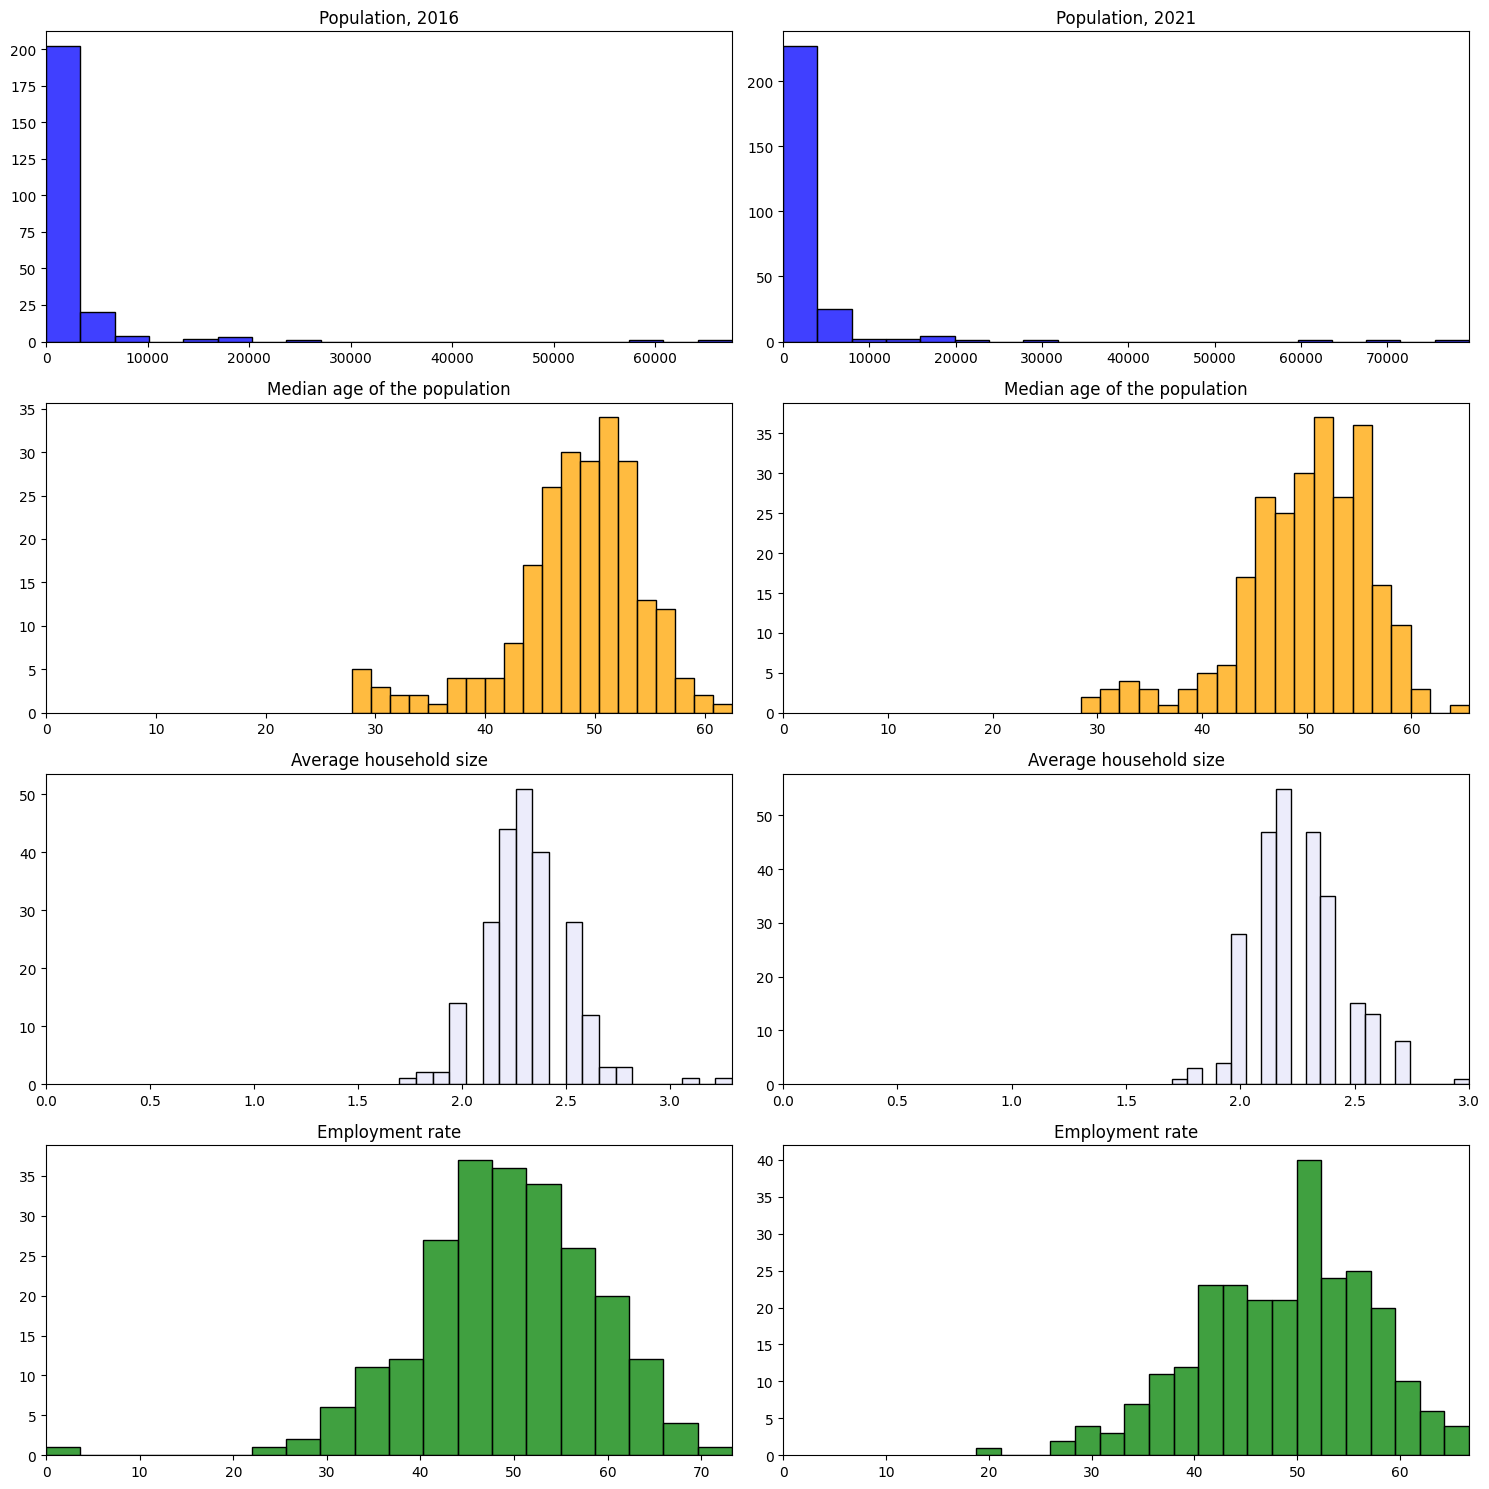

In [25]:
import seaborn as sns
# Finally, let's pick a few key characteristics to graph for both years
# We'll have a look at total population, median age, average household size, and employment rate

# First, we'll make a helper function to plot a single characteristic using seaborn
def plotCharacteristic(ax, df, colName, title, color = 'teal'):
    '''
    Plot a characteristic from a dataframe on a given axis

    Parameters:
    ax (Axis): The axis to plot on
    df (DataFrame): The dataframe to extract from
    colName (str): The column name to extract
    title (str): The title of the plot
    color (str): The color of the plot (optional)
    '''
    # Extract the data from the dataframe
    data = df[colName]
    # Remove any rows with NaN values
    data = data.dropna()
    # Plot the data
    sns.histplot(data, ax=ax, bins=20, color=color)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(0, data.max())
    
# For 2016
colNames2016 = ['Population, 2016', 'Median age of the population', 'Average household size', 'Employment rate']
# The 2021 data has a different column name for a few characteristics, so let's build a separate list
colNames2021 = ['Population, 2021', 'Median age of the population', 'Average household size', 'Employment rate']

# We'll use matplotlib to create a grid of subplots to display the data
# and compare between years
fig, axs = plt.subplots(len(colNames2016), 2, figsize=(15, 15))
colors = ['blue', 'orange', 'lavender', 'green', 'rose', 'teal']
for i, col in enumerate(colNames2016):
    plotCharacteristic(axs[i, 0], communityDF2016, col, col, colors[i])
    print('Row:', 0, 'Column:', 0)
    plotCharacteristic(axs[i, 1], communityDF2021, colNames2021[i], colNames2021[i], colors[i])
plt.tight_layout()
# save the plot to a file
plt.savefig('./figures/Census_data_EDA.png')



In [26]:
# Let's have a look at the summary statistics for both datasets
communityDF2016.describe()

CHARACTERISTIC_NAME,% of owner households spending 30% or more of its income on shelter costs,% of owner households with a mortgage,% of tenant households in subsidized housing,% of tenant households spending 30% or more of its income on shelter costs,0 Management occupations,0 to 14 years,0 to 17 years,0 to 17 years (%),0 to 4 years,0 to 5 years,...,Total labour force population aged 15 years and over by occupation - National Occupational Classification (NOC) 2016 - 25% sample data,Total number of census families in private households - 100% data,Total population aged 15 years and over by work activity during the reference year - 25% sample data,Total visible minority population,Two-or-more person non-census-family households,Under 5 years,Unemployed,Unemployment rate,With employment income,Without employment income
count,213.000000,230.000000,230.000000,213.000000,230.000000,230.000000,214.000000,204.000000,230.000000,214.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,214.000000,214.000000
mean,7.980751,45.722609,5.681304,16.394836,112.456522,374.869565,477.827103,23.724020,115.826087,147.406542,...,1294.304348,761.913043,2101.847826,74.608696,37.108696,16.652174,151.826087,15.027391,1538.341121,711.752336
std,4.511584,16.274408,11.195533,18.411016,325.460621,998.697615,1238.873418,9.830282,322.699064,405.366499,...,3421.739508,1836.663137,5370.979817,494.539020,156.235075,66.879027,322.890081,8.638145,3834.163874,1722.805085
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,3.600000,0.000000,0.000000,...,10.000000,5.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,50.000000
25%,6.000000,41.125000,0.000000,0.000000,15.000000,75.000000,100.000000,16.700000,20.000000,30.000000,...,270.000000,195.000000,505.000000,0.000000,5.000000,0.000000,35.000000,9.375000,390.000000,216.250000
50%,8.700000,48.850000,0.000000,0.000000,35.000000,145.000000,187.500000,22.800000,45.000000,55.000000,...,512.500000,345.000000,942.500000,10.000000,10.000000,0.000000,80.000000,13.350000,645.000000,347.500000
75%,10.800000,54.875000,6.200000,31.800000,75.000000,265.000000,333.750000,29.625000,85.000000,100.000000,...,1032.500000,631.250000,1681.250000,20.000000,25.000000,15.000000,158.750000,19.275000,1197.500000,582.500000
max,17.800000,76.800000,57.100000,100.000000,3365.000000,10045.000000,12040.000000,58.300000,3245.000000,3955.000000,...,34150.000000,18730.000000,55455.000000,5840.000000,1750.000000,810.000000,3285.000000,66.700000,37170.000000,18280.000000


In [27]:
communityDF2021.describe()

CHARACTERISTIC_NAME,"% of households living in a dwelling provided by the local government, First Nation or Indian band spending more than 30% on shelter costs",% of owner households spending 30% or more of its income on shelter costs,% of owner households with a mortgage,% of tenant households in subsidized housing,% of tenant households spending 30% or more of its income on shelter costs,0 Legislative and senior management occupations,0 to 14 years,0 to 17 years,0 to 17 years (%),0 to 4 years,...,Total - Visible minority for the population in private households - 25% sample data,Total number of census families in private households - 100% data,Total visible minority population,Two-maintainer household,Two-or-more-person non-census-family households,Under 5 years,Unemployed,Unemployment rate,With employment income,Without employment income
count,11.000000,234.000000,242.000000,212.000000,211.000000,257.000000,257.000000,248.000000,233.000000,257.000000,...,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,248.000000,248.000000
mean,0.754545,5.751709,47.464876,7.192925,12.157820,13.112840,432.042802,539.637097,17.400858,125.603113,...,2951.673152,881.945525,170.622568,580.505837,57.821012,21.264591,156.342412,12.594553,1749.334677,858.750000
std,2.029465,3.462196,10.519248,12.241043,14.325321,45.385059,1212.474231,1470.199548,7.691862,358.451703,...,7941.614984,2217.655608,1027.368073,1548.110345,242.598480,94.528311,404.480096,6.940853,4752.190637,2111.836329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.400000,0.000000,...,55.000000,15.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,115.000000,65.000000
25%,0.000000,4.225000,40.400000,0.000000,0.000000,0.000000,80.000000,110.000000,12.000000,25.000000,...,695.000000,220.000000,0.000000,120.000000,10.000000,0.000000,40.000000,8.300000,397.500000,233.750000
50%,0.000000,6.100000,48.550000,0.000000,0.000000,0.000000,165.000000,205.000000,16.000000,45.000000,...,1205.000000,365.000000,10.000000,220.000000,15.000000,0.000000,75.000000,11.400000,670.000000,387.500000
75%,0.000000,8.175000,54.200000,13.600000,25.000000,10.000000,300.000000,386.250000,22.100000,95.000000,...,2165.000000,680.000000,35.000000,435.000000,30.000000,15.000000,145.000000,15.500000,1282.500000,662.500000
max,6.700000,16.700000,75.900000,80.000000,66.700000,455.000000,12025.000000,14205.000000,48.000000,3570.000000,...,77405.000000,21270.000000,11545.000000,15380.000000,2655.000000,1055.000000,3895.000000,43.500000,46335.000000,19610.000000


In [28]:
# It's worth noting that the 2021 GEO_NAME column includes the census subdivision
# type (eg. Parish, Town, City, etc.)
# The format is "Community Name, Census Subdivision Type"
# Let's count the commas to see if any communities have more than one
# comma in their name
commas = [community.count(',') for community in communityDF2021.index]
if sum(commas) > len(communityDF2021.index):
    print('Some communities have more than one comma in their name.')

In [31]:
# Looks like there are no communities with more than 1 comma, so let's split on the comma
communityDF2021.index = [community.split(',')[0] for community in communityDF2021.index]
communityDF2021.head()

CHARACTERISTIC_NAME,"% of households living in a dwelling provided by the local government, First Nation or Indian band spending more than 30% on shelter costs",% of owner households spending 30% or more of its income on shelter costs,% of owner households with a mortgage,% of tenant households in subsidized housing,% of tenant households spending 30% or more of its income on shelter costs,0 Legislative and senior management occupations,0 to 14 years,0 to 17 years,0 to 17 years (%),0 to 4 years,...,Total - Visible minority for the population in private households - 25% sample data,Total number of census families in private households - 100% data,Total visible minority population,Two-maintainer household,Two-or-more-person non-census-family households,Under 5 years,Unemployed,Unemployment rate,With employment income,Without employment income
Saint Martins,NaN,5.1,49.0,0.0,0.0,0.0,145.0,170.0,17.0,45.0,...,1260.0,390.0,10.0,265.0,10.0,0.0,85.0,14.0,650.0,385.0
St. Martins,NaN,NaN,52.4,0.0,NaN,0.0,30.0,45.0,NaN,10.0,...,240.0,90.0,0.0,40.0,0.0,0.0,15.0,13.6,165.0,120.0
Simonds,NaN,5.3,58.7,0.0,22.2,0.0,630.0,770.0,11.0,175.0,...,3910.0,1220.0,150.0,700.0,45.0,15.0,215.0,10.6,2300.0,980.0
Saint John,NaN,11.4,60.7,16.1,27.1,230.0,10180.0,12155.0,24.4,3045.0,...,68180.0,18935.0,7405.0,12065.0,1845.0,615.0,3845.0,10.9,38415.0,19610.0
Musquash,NaN,5.0,57.0,0.0,0.0,0.0,210.0,240.0,8.0,65.0,...,1250.0,395.0,0.0,245.0,20.0,0.0,90.0,14.5,705.0,340.0


In [32]:
# Finally, let's save the dataframes to CSV files
communityDF2016.to_csv('./processedData/communityData2016.csv')
communityDF2021.to_csv('./processedData/communityData2021.csv')

In [16]:
# Next, we'll use the 2021 data to define our list of communities,
# and get the road networks from osmnx
import osmnx as ox
import networkx as nx

# We can use the index of our community dataframe for 2021
communityList = communityDF2021.index

In [18]:
# Now let's get the road networks for all the communities

roadNetworks = {}
# NOTE: THIS IS THE LONG WAY. IT SCRAPES EACH COMMUNITY FROM OSM INDIVIDUALLY
# SEE ./roadNetworks/ FOR THE SAVED NETWORKS
# for comm in communityList:
#     # We'll use the community name as the place name, 
#     # and add the rest of the info directly
#     placeName = comm + ', New Brunswick, Canada'
#     # We'll specifically use the 'drive' network type, as OSM is 
#     # more likely to be missing data on other types
#     # Let's also include some error handling in case the network can't be found
#     try:
#         G = ox.graph_from_place(placeName, network_type='drive')
#     except Exception as e:
#         print(f'Error getting road network for community: {comm}. Error: {e}')
#         continue
#     roadNetworks[comm] = G

# If road networks have been saved previously, we can load them from the
# roadNetworks directory instead of scraping them again.
# The files are saved as .graphml files, which can be loaded directly into osmnx

# We will load every file in the directory, and add it to the roadNetworks dictionary
# The file name is the community name with any spaces replaced by underscores
# The glob module will help us with this
import glob
for file in glob.glob('./roadNetworks/*.graphml'):
    # Extract the community name from the file name
    commName = file.split('\\')[-1].split('.')[0].replace('_', '/')
    # Load the graph from the file
    G = ox.load_graphml(file)
    roadNetworks[commName] = G


In [19]:
# Let's save each roadnetwork as a graphml file so we don't have to
# download them again
# for comm, G in roadNetworks.items():
#     # First let's remove any escape characters from the community name
#     comm = comm.replace('/', '_')
#     ox.save_graphml(G, f'./roadNetworks/{comm}.graphml')


Plotting road network for Kingston


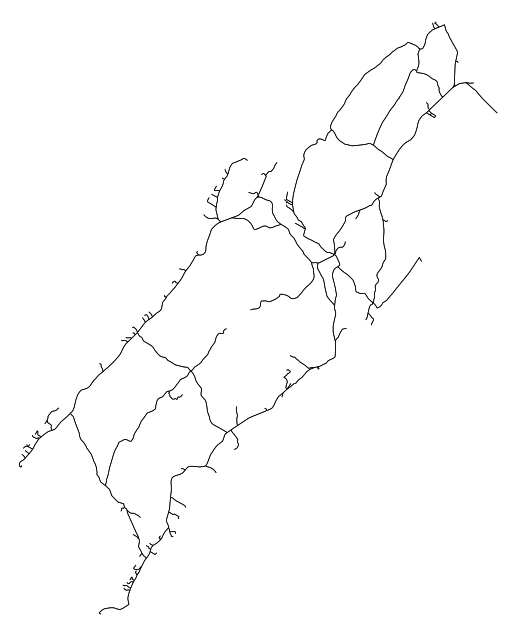

Plotting road network for Coverdale


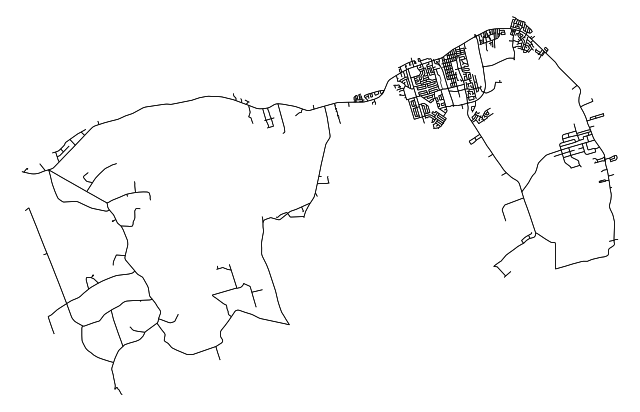

Plotting road network for Nigadoo


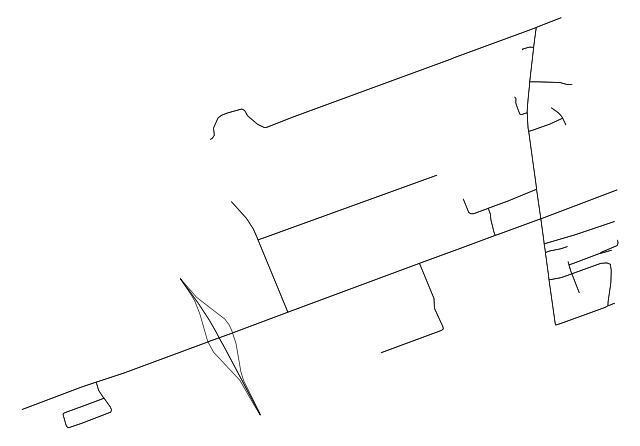

Plotting road network for Grand Bay-Westfield


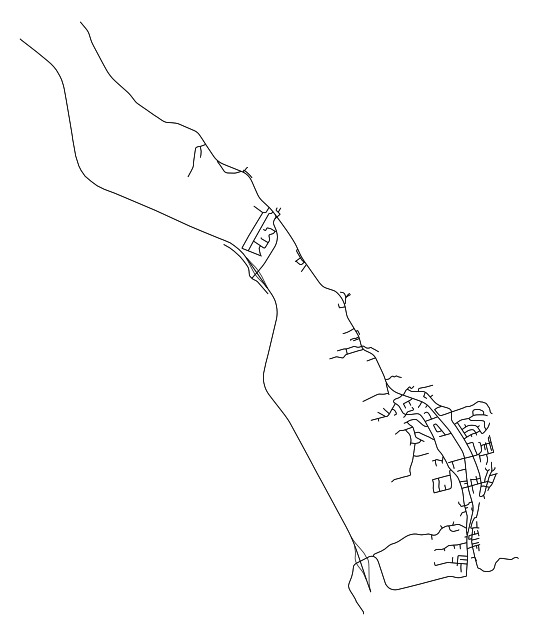

Plotting road network for Riverside-Albert


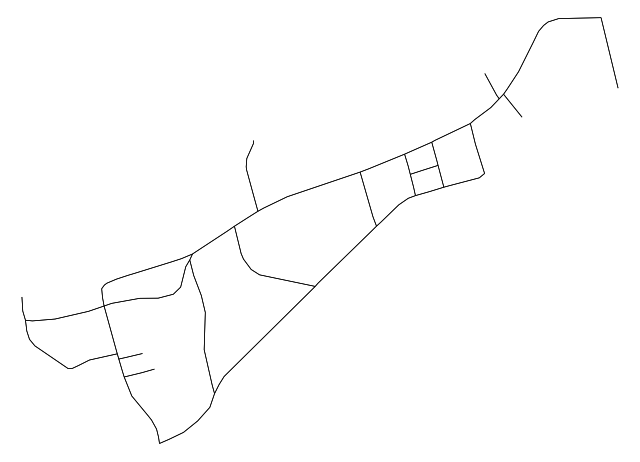

In [20]:
import random
# Let's plot some random road networks to see what they look like
# Let's get the list of keys with a road network
communityNetworks = list(roadNetworks.keys())
graphCount = 5
rand = random.sample(range(len(communityNetworks)), graphCount)
# Now we can plot the graphs
for value in rand:
    comm = communityNetworks[value]
    G = roadNetworks[comm]
    print(f'Plotting road network for {comm}')
    ox.plot_graph(G, node_size=0, edge_linewidth=0.5, edge_color='black', bgcolor= 'white')


In [21]:
# Finally, we are ready to extract the road network characteristics
# for each community. We will use the following characteristics:
# - node connectivity - The minimum number of nodes that must be removed to disconnect the network. This measuure
#  is useful for understanding how robust a network is to node failure.
# - betweenness centrality - Betweenness centrality of a node 
# is the sum of the fraction of all-pairs shortest paths that pass through the node. This measure
# allows us to understand how important a node is in the network, and can be used to identify key nodes.
# - Average node degree - Node degree is number of edges connected to a node. This measure
# is the average of all node degrees in the network, and can be used to understand how well connected
# a network is.

# Train on population + road network data only to see if any prediction is possible

# We will use the networkx library to calculate these values
networkCharacteristics = {}
for comm in communityNetworks:
    G = roadNetworks[comm]
    # First, we'll calculate the node connectivity
    nodeConnectivity = nx.node_connectivity(G)
    # Next, we'll calculate the betweenness centrality
    betweennessCentrality = nx.betweenness_centrality(G)
    # Finally, we'll calculate the average node degree
    avgNodeDegree = np.mean([val for (node, val) in G.degree()])
    # We'll store these values in a dictionary
    networkCharacteristics[comm] = {'Node Connectivity': nodeConnectivity,
                                    'Betweenness Centrality': betweennessCentrality,
                                    'Average Node Degree': avgNodeDegree}



In [46]:
# Let's convert this dictionary to a DataFrame, and transpose it to give each community its own row
networksByCommunity = pd.DataFrame(networkCharacteristics).T

# Let's also make sure that the data types are correct
networksByCommunity = networksByCommunity.apply(pd.to_numeric, errors='ignore')
networksByCommunity.head()


C:\Users\danes\AppData\Local\Temp\ipykernel_199664\2798937746.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  networksByCommunity = networksByCommunity.apply(pd.to_numeric, errors='ignore')


,Node Connectivity,Betweenness Centrality,Average Node Degree
Aberdeen,1,"{1638571580: 0.0, 1638571707: 0.02531645569620...",4.550000
Acadieville,1,"{1665424050: 0.0, 1665425717: 0.0, 1665427309:...",4.203390
Addington,0,"{604124914: 0.1076792705080486, 1020806170: 0....",5.054902
Alma,1,"{16878195: 0.4796404019037546, 857586389: 0.20...",4.063492
Alnwick,1,"{1729459293: 0.0, 1729460255: 0.01059597042722...",4.518519


In [47]:
# The betweenness centrality we have here is a dictionary containing values for all nodes.
# What we are trying to extract from this measure is an evaluation of road network quality. With more
# high betweenness centrality nodes, we can expect a more robust network. To this end, let's use the average of the top
# 10% of nodes by betweenness centrality as our measure of network quality.
for comm in networksByCommunity.index:
    # Get the betweenness centrality values for the community
    betweenness = networksByCommunity.loc[comm, 'Betweenness Centrality']
    # Sort by values
    sortResult = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
    # Get the top 10% of nodes
    topNodes = [node for (node, val) in sortResult[:int(len(sortResult) * 0.1)]]
    # Get the average betweenness centrality of the top nodes
    avgTopBetweenness = np.mean([betweenness[node] for node in topNodes])
    # Add this value to the dataframe
    networksByCommunity.loc[comm, 'Top 10% BC'] = avgTopBetweenness
    
networksByCommunity.head()

c:\Users\danes\Documents\ACENETMicrocredentialinAdvancedComputing\ISP\CommunityGrowthPrediction\ispEnv\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\danes\Documents\ACENETMicrocredentialinAdvancedComputing\ISP\CommunityGrowthPrediction\ispEnv\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\danes\Documents\ACENETMicrocredentialinAdvancedComputing\ISP\CommunityGrowthPrediction\ispEnv\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\danes\Documents\ACENETMicrocredentialinAdvancedComputing\ISP\CommunityGrowthPrediction\ispEnv\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\danes\Documents

,Node Connectivity,Betweenness Centrality,Average Node Degree,Top 10% BC
Aberdeen,1,"{1638571580: 0.0, 1638571707: 0.02531645569620...",4.550000,0.505883
Acadieville,1,"{1665424050: 0.0, 1665425717: 0.0, 1665427309:...",4.203390,0.506352
Addington,0,"{604124914: 0.1076792705080486, 1020806170: 0....",5.054902,0.162141
Alma,1,"{16878195: 0.4796404019037546, 857586389: 0.20...",4.063492,0.469240
Alnwick,1,"{1729459293: 0.0, 1729460255: 0.01059597042722...",4.518519,0.281422


In [48]:
# There are a few low info road networks, so let's replace any NaN values with 0 so we don't need to drop the entry entirely.
networksByCommunity.fillna(0, inplace=True)
networksByCommunity.isna().sum()

Node Connectivity         0
Betweenness Centrality    0
Average Node Degree       0
Top 10% BC                0
dtype: int64

In [50]:
# Let's have a quick look at the summary statistics for the network characteristics
networksByCommunity.describe()

,Node Connectivity,Average Node Degree,Top 10% BC
count,170.000000,170.000000,170.000000
mean,0.735294,4.575893,0.344952
std,0.455656,0.425951,0.141671
min,0.000000,2.000000,0.000000
25%,0.000000,4.333942,0.253716
50%,1.000000,4.536041,0.340454
75%,1.000000,4.849798,0.454551
max,2.000000,5.761468,0.675000


In [ ]:
# Seems like reasonable results
# Let's plot some graphs to see our distributions
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
ignoreCols = ['Betweenness Centrality']
for i, col in enumerate(networksByCommunity.columns):
    if col in ignoreCols:
        continue
    sns.histplot(networksByCommunity[col], ax=axs[i], bins=20)
    axs[i].set_title(col)

In [24]:
# Finally, let's save this dataframe to a CSV file
networkDF.to_csv('./processedData/networkCharacteristics.csv')

NameError: name 'networkDF' is not defined